# Import libraries

In [1]:
import matplotlib.pyplot as plt
import imutils
from imutils import contours
import numpy as np
import cv2
cv2.__version__

'4.7.0'

# Key answer

In [2]:
ANSWER_KEY = {0: 1, 1: 3, 2: 0, 3: 2, 4: 1, 5: 3, 6: 4, 7: 1, 8: 3, 9: 0}

# Load the image

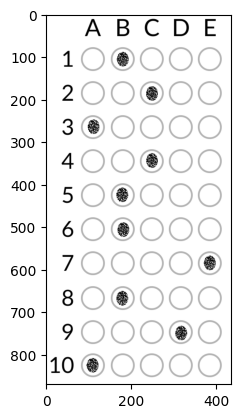

In [3]:
image = cv2.imread('answers_1.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Conversion to grayscale

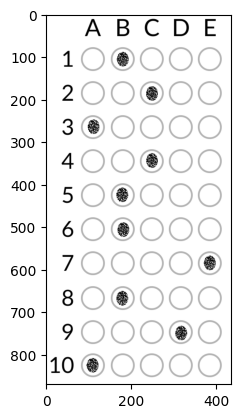

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# Blur

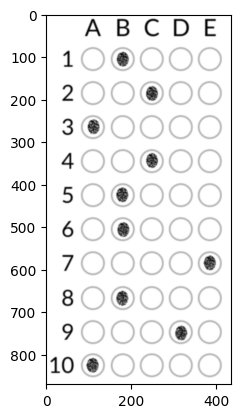

In [5]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))

# Edge detection

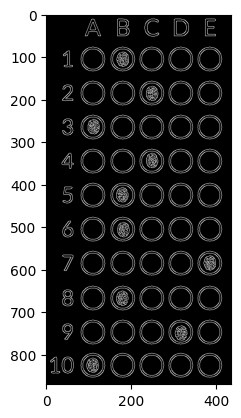

In [6]:
thresh = cv2.Canny(blurred, 70, 70)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

# Contour escalation

In [7]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
len(cnts)

68

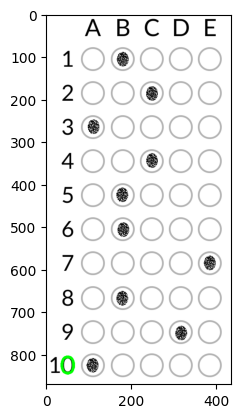

In [8]:
cnt1 = cv2.drawContours(image.copy(), [cnts[0]], -1, (0, 255, 0), 5)
plt.imshow(cv2.cvtColor(cnt1, cv2.COLOR_BGR2RGB))

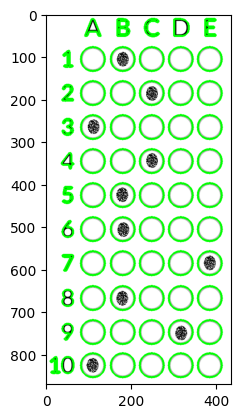

In [9]:
cnt_img = image.copy()
for contour in cnts:
    cv2.drawContours(cnt_img, [contour], -1, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(cnt_img, cv2.COLOR_BGR2RGB))

# Extracting the appropriate contours

Number of answer fields: 50


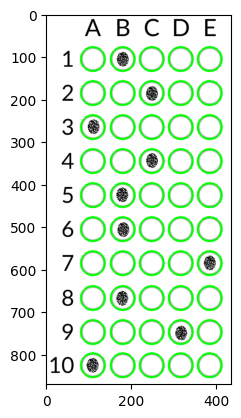

In [10]:
question_contours = []

for contour in cnts:
    (x, y, w, h) = cv2.boundingRect(contour)
    ar = w / float(h)
    
    if w >=50 and h >=50 and ar > 0.9 and ar < 1.1:
        question_contours.append(contour)
    
print(f'Number of answer fields: {len(question_contours)}')

cnt_img = image.copy()
for contour in question_contours:
    cv2.drawContours(cnt_img, [contour], -1, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(cnt_img, cv2.COLOR_BGR2RGB))

# Solution for one question

In [11]:
# Sorting contour from top to bottom
question_top_bottom = imutils.contours.sort_contours(question_contours, method='top-to-bottom')[0]

(375, 0)
1
(702, 1)
1
(702, 1)
1
(702, 1)
1
(702, 1)
1


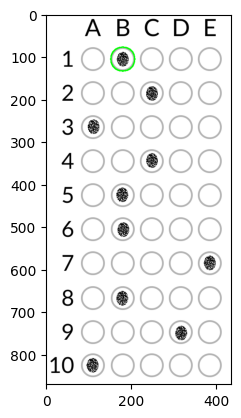

In [12]:
# Extracting the first 5 contours and sorting from left to right
first_5 = question_top_bottom[:5]
first_5_left_right = imutils.contours.sort_contours(first_5, method='left-to-right')[0]

img = image.copy()

marked = None

for idx, contour in enumerate(first_5_left_right):
    # create a mask with only zero
    mask = np.zeros(thresh.shape, dtype='uint8')
    
    # draw a contour on the mask
    cv2.drawContours(mask, [contour], -1, 255, -1)

    
    # bitwise_and on image thresh
    mask = cv2.bitwise_and(thresh, thresh, mask=mask) 
    
    # count the number of non-zero pixels
    total = cv2.countNonZero(mask)
    
    if marked is None or total > marked[0]:
        marked = (total, idx)
    print(marked)
    
    # color red
    color = (0, 0, 255)
    
    key = ANSWER_KEY[0]
    print(key)
    
    if key == marked[1]:
        # color green
        color = (0, 255, 0)

cv2.drawContours(img, [first_5_left_right[key]], -1, color, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    

# Solution for the whole test

(375, 0)
(702, 1)
(702, 1)
(702, 1)
(702, 1)
1
(375, 0)
(375, 0)
(696, 2)
(696, 2)
(696, 2)
3
(710, 0)
(710, 0)
(710, 0)
(710, 0)
(710, 0)
0
(375, 0)
(375, 0)
(695, 2)
(695, 2)
(695, 2)
2
(375, 0)
(698, 1)
(698, 1)
(698, 1)
(698, 1)
1
(375, 0)
(693, 1)
(693, 1)
(693, 1)
(693, 1)
3
(375, 0)
(375, 0)
(375, 0)
(375, 0)
(709, 4)
4
(375, 0)
(691, 1)
(691, 1)
(691, 1)
(691, 1)
1
(375, 0)
(375, 0)
(375, 0)
(692, 3)
(692, 3)
3
(693, 0)
(693, 0)
(693, 0)
(693, 0)
(693, 0)
0


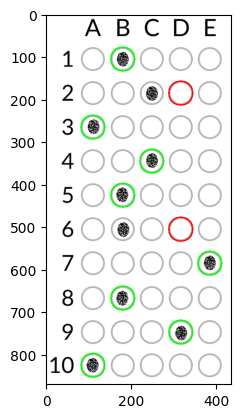

In [13]:
img = image.copy()

correct = 0

# Sorting contour from top to bottom
question_top_bottom = imutils.contours.sort_contours(question_contours, method='top-to-bottom')[0]

for question, idx in enumerate(range(0, len(question_contours), 5)):

    # Extracting the first 5 contours and sorting from left to right
    fields = question_top_bottom[idx:idx + 5]
    fields = imutils.contours.sort_contours(fields, method='left-to-right')[0]

    marked = None

    for cnt_idx, contour in enumerate(fields):
        # create a mask with only zero
        mask = np.zeros(thresh.shape, dtype='uint8')

        # draw a contour on the mask
        cv2.drawContours(mask, [contour], -1, 255, -1)


        # bitwise_and on image thresh
        mask = cv2.bitwise_and(thresh, thresh, mask=mask) 

        # count the number of non-zero pixels
        total = cv2.countNonZero(mask)

        if marked is None or total > marked[0]:
            marked = (total, cnt_idx)
        print(marked)

    # mark red
    color = (0, 0, 255)

    key = ANSWER_KEY[question]
    print(key)

    if key == marked[1]:
        # mark green
        color = (0, 255, 0)
        correct += 1

    cv2.drawContours(img, [fields[key]], -1, color, 2)
    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    

# Displaying the solution

8


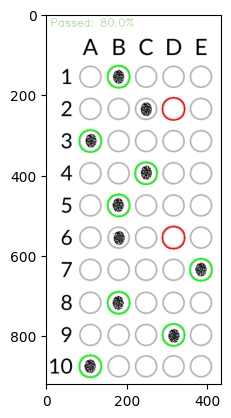

In [14]:
# adding top border
checked = cv2.copyMakeBorder(
    src=img,
    top=50,
    bottom=0,
    left=0,
    right=0,
    borderType=cv2.BORDER_CONSTANT,
    value=(255, 255, 255)
)
print(correct)
score = (correct / 10)
color = (50, 168, 82) if score >= 0.6 else(71, 7, 219)
text = 'Passed' if score >= 0.6 else 'Filed'

cv2.putText(img=checked, text=f'{text}: {score * 100}%', org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.9, color=color)
plt.imshow(cv2.cvtColor(checked, cv2.COLOR_BGR2RGB))